**Project Title-** Customer Churn Prediction

**Project Description:-** Build a predictive model to identify customers who are likely to churn from a telecom company using demographic and service usage data.

# **Step-2: Set up the Environment and Import the Libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Step 3: Load and Preview the dataset.**

In [3]:
# load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Step-4: Data Exploration**

In [5]:
# check the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-7-2819472205>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [8]:
# view basic statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Understand class distribution (Churned vs Not churned)
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


# **Step-5: Data Preprocessing**

In [10]:
# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

In [11]:
# Convert target column "Churn" to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
# Encode categorical variables
# from sklearn.prepocessing import LabelEncoder

#Label encode binary categorical columns

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
# one hot encode other categorical variables
df = pd.get_dummies(df, drop_first=True)

In [14]:
# sclae numerical columns
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
# split the data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Step-6: EDA**

**1. Churn Rate Overview**

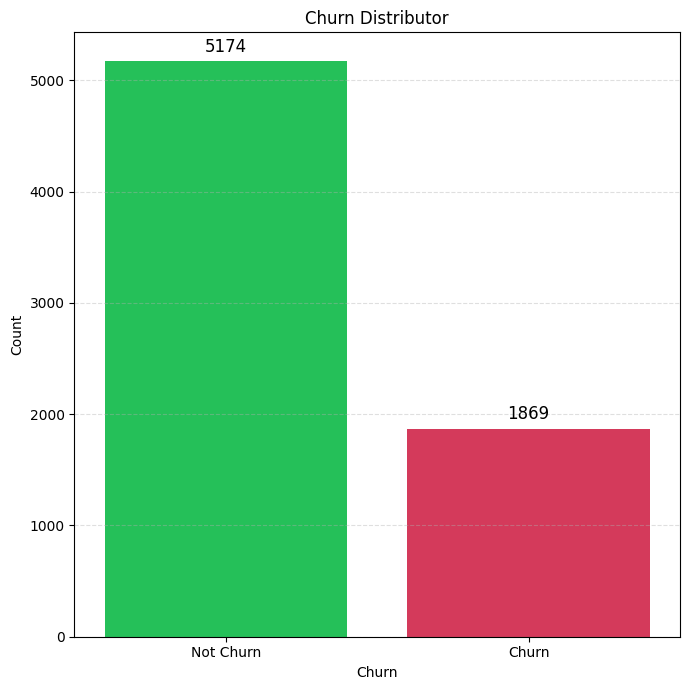

In [47]:
# Churn count plot
plt.figure(figsize=(7, 7))
ax = sns.countplot(x='Churn', data=df, hue='Churn', legend= False, palette=['#0BDA51', '#EE204D'])
plt.title('Churn Distributor')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
for p in ax.patches:
    # Get the height of the bar (which is the count value)
    height = p.get_height()

    # If the bar height is 0, skip it to avoid placing '0'
    if height == 0:
        continue

    # Add the text label
    ax.text(p.get_x() + p.get_width() / 2.,  # X-coordinate: center of the bar
            height + 50,  # Y-coordinate: just above the bar. Adjust `+50` for padding.
            '{:d}'.format(int(height)),  # Text: The count value, formatted as an integer
            ha='center',  # Horizontal alignment: center the text
            va='bottom',  # Vertical alignment: place the text's bottom edge at the y-coord
            fontsize=12,  # Font size of the label
            color='black') # Color of the label text

# Adjust layout to prevent labels from being cut off
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('Churn_Distributor.png', dpi=500)
plt.show()

In [17]:
# Churn Percentage
churn_rate = df['Churn'].value_counts(normalize=True)[1] * 100
print(f"Overall Churn Rate: {churn_rate: .2f}%")

Overall Churn Rate:  26.54%


In [18]:
# Not Churn Percentage
not_churn_rate = df['Churn'].value_counts(normalize=True)[0] * 100
print(f"Overall Not Churn Rate: {not_churn_rate: .2f}%")

Overall Not Churn Rate:  73.46%


**2. Churn vs Contract Type**

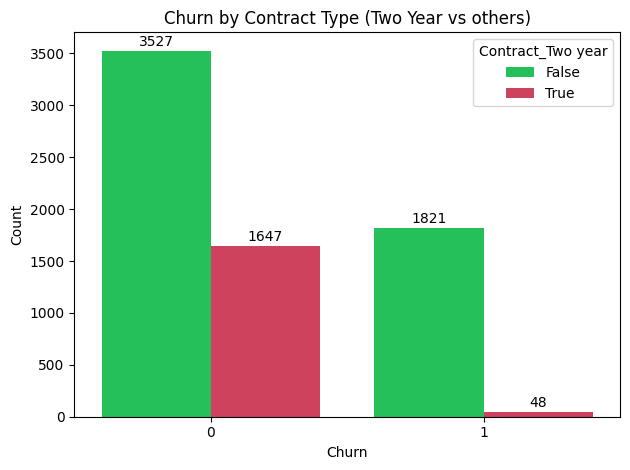

In [46]:
#plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Churn", hue="Contract_Two year", data=df, palette=['#0BDA51', '#E52B50'])
plt.title("Churn by Contract Type (Two Year vs others)")
plt.ylabel('Count')
if hasattr(ax, 'containers'):
    for container in ax.containers:
        # Loop through each bar in the container
        for bar in container:
            height = bar.get_height()
            if height == 0: # Skip bars with zero height
                continue
            ax.text(bar.get_x() + bar.get_width() / 2., # x-position
                    height + 20, # y-position (adjust +20 for padding)
                    '{:d}'.format(int(height)), # Text to display
                    ha='center', va='bottom', # Alignment
                    fontsize=10, color='black')
else:
    for p in ax.patches:
        height = p.get_height()
        # Filter out very small bars if they exist due to a large number of bars or very small counts
        if height < 1: # You might need to adjust this threshold or remove it
            continue
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 20, # Adjust padding as needed
                '{:d}'.format(int(height)),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('Churn by Contract Type (Two Year vs others).png', dpi=500)
plt.show()

**3. Tenure vs Churn**

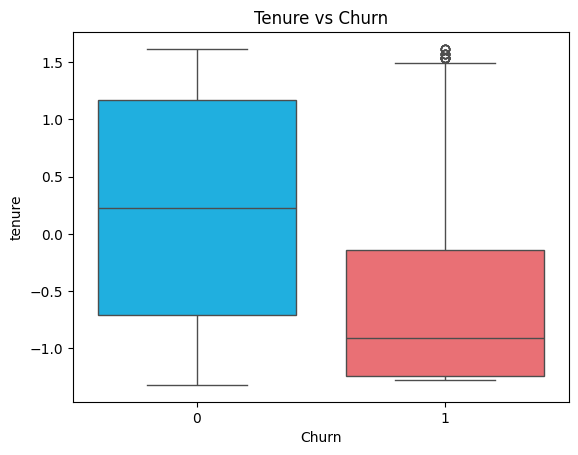

In [20]:
sns.boxplot(x="Churn", y="tenure", data=df, hue= "Churn", palette= ['#00BFFF', '#fd5c63'], legend= False)
plt.title('Tenure vs Churn')
plt.savefig('Tenure vs Churn.png', dpi=500)
plt.show()

**4. Churn vs Payment Method**

In [21]:
if 'PaymentMethod' not in df.columns:
    print("Detected that 'PaymentMethod' column is missing. Attempting to reconstruct from one-hot encoded columns.")
    # Identify potential one-hot encoded payment method columns.
    payment_method_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]

    if len(payment_method_cols) > 0:
        # Reconstruct the original 'PaymentMethod' column
        # Find the column where the value is 1 for each row.
        df['PaymentMethod'] = df[payment_method_cols].idxmax(axis=1)
        # Clean up the reconstructed column names (remove 'PaymentMethod_')
        df['PaymentMethod'] = df['PaymentMethod'].str.replace('PaymentMethod_', '')

        print("Successfully reconstructed 'PaymentMethod' column.")
    else:
        print("Could not find one-hot encoded 'PaymentMethod_' columns to reconstruct. Please check your data.")
        # If reconstruction fails, we cannot proceed with the plot as intended.
        # You might need to adjust column names or the source of your DataFrame.
        exit()

Detected that 'PaymentMethod' column is missing. Attempting to reconstruct from one-hot encoded columns.
Successfully reconstructed 'PaymentMethod' column.


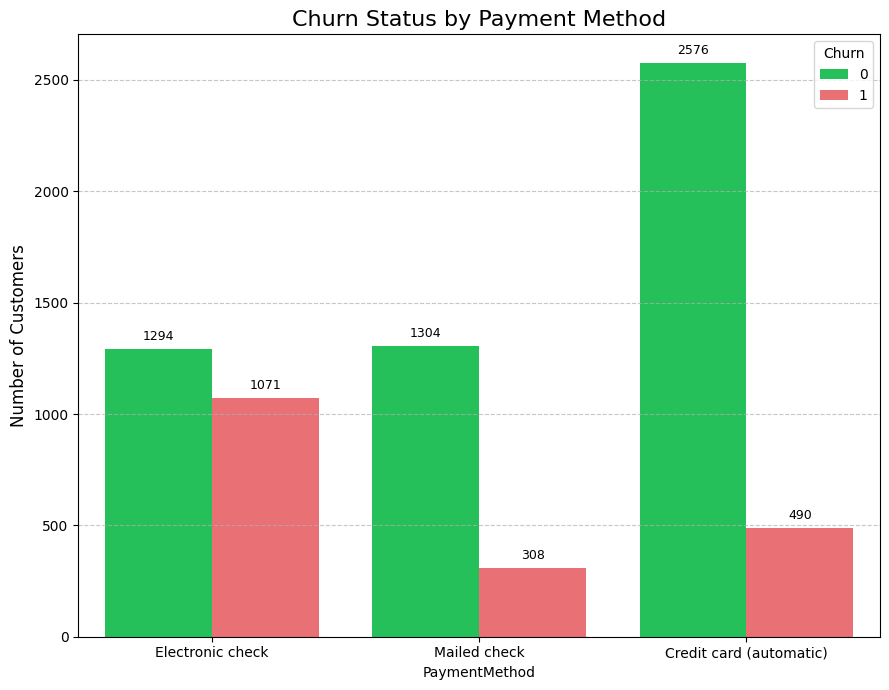

In [27]:

plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=['#0BDA51', '#fd5c63'])
plt.title("Churn Status by Payment Method", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0, ha='center')

# --- 5. Add Count Values Above Each Bar ---
if hasattr(ax, 'containers'):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    height + (ax.get_ylim()[1] * 0.01),
                    '{:d}'.format(int(height)),
                    ha='center', va='bottom',
                    fontsize=9, color='black')
else:
    print("Consider updating Matplotlib for optimal label placement with 'hue' plots.")
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        ax.text(p.get_x() + p.get_width() / 2.,
                height + (ax.get_ylim()[1] * 0.01),
                '{:d}'.format(int(height)),
                ha='center', va='bottom', fontsize=9, color='black')

# --- 6. Final Plot Adjustments and Saving ---
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('churn_vs_payment_method_reconstructed.png', dpi=500)

plt.show()

**5. Correlation Heatmap of Numerical Features**

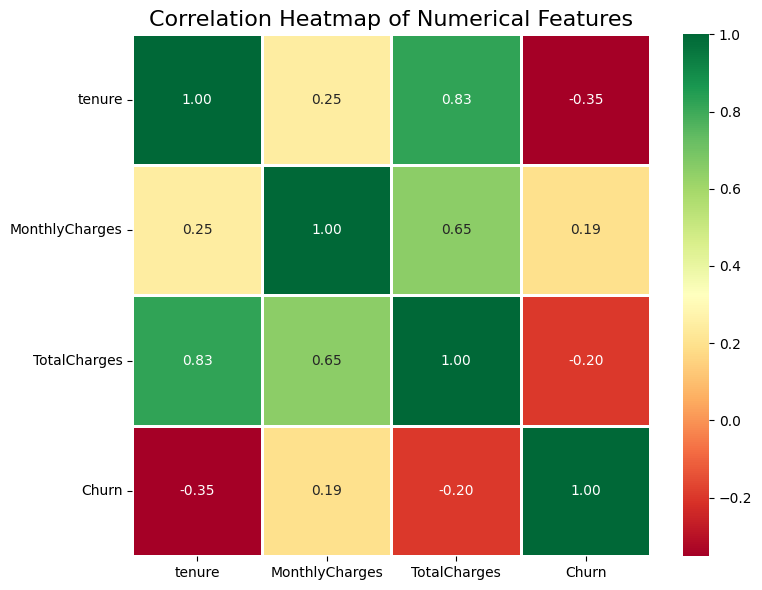

In [42]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_numerical = df[numerical_cols]

# --- 4. Calculate the correlation matrix ---
correlation_matrix = df_numerical.corr()

# --- 5. Generate the heatmap plot ---
plt.figure(figsize=(8, 6)) # Set the figure size for better readability

sns.heatmap(
    correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='RdYlGn', # Choose a color map (RdYlGn is good for correlations: red for negative, green for positive)
    fmt=".2f",       # Format the annotation to two decimal places
    linewidths=1.0    # Add lines between cells for better separation
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=0, ha='center') # Rotate x-axis labels if they overlap
plt.yticks(rotation=0) # Keep y-axis labels horizontal

plt.tight_layout() # Adjust layout to prevent elements from being cut off

# --- 6. Save the plot ---
plt.savefig('numerical_features_correlation_heatmap.png', dpi=300)

# --- 7. Display the plot ---
plt.show()

# **Step-7: Feature Selection and Model Training**

**Random Forest Classifier: Classification Report, Accuracy Score**

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy 0.7863733144073811
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



**Logistic Regression classification model: Confusion Matrix**

In [48]:
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

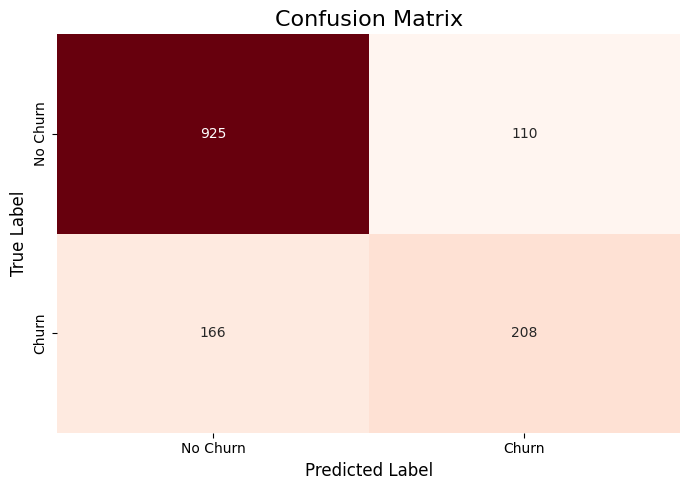

In [63]:
y_pred = model.predict(X_test)

# --- 6. Generate and plot the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# Get class labels for the plot
class_labels = ['No Churn', 'Churn'] # 0 for No Churn, 1 for Churn

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('confusion_matrix.png', dpi=500)

plt.show()

# **Key Insights from Data Analysis:**

**Payment Method is a Strong Indicator of Churn**:

1. Electronic Check Users are High-Risk: Customers using 'Electronic check' as their payment method show a significantly higher churn rate compared to other methods. This was clearly visible in the "Churn Percentage by Payment Method" plot.
2. Automatic Payments Promote Loyalty: Customers utilizing 'Bank transfer (automatic)' and 'Credit card (automatic)' exhibit considerably lower churn rates. These methods are associated with more stable and loyal customers.

**Tenure is Crucial for Retention:**

1. Longer Tenure, Lower Churn: The correlation heatmap revealed a moderate negative correlation between tenure and Churn. This indicates that the longer a customer stays with the company, the less likely they are to churn. This is a fundamental aspect of customer loyalty.

**Monthly Charges and Total Charges have Weaker, but Notable Relationships:**

1. Monthly Charges and Churn (Weak Positive): A slight positive correlation between MonthlyCharges and Churn suggests that customers with higher monthly bills might have a marginally increased tendency to churn.
2. Total Charges and Churn (Weak Negative): A weak negative correlation between TotalCharges and Churn implies that customers who have accumulated higher total charges are slightly less likely to churn, which aligns with the tenure insight.

# **Suggested Retention Strategies and Customer Service Improvements:**

**1. Promote Automatic Payment Methods**:

**Actionable Insight:** The stark difference in churn rates among payment methods is a major lever.

**Strategy:** Actively encourage customers, especially new ones or those using 'Electronic check', to switch to automatic payment options like bank transfers or credit card auto-pay. This could be done through incentives (e.g., small discount for auto-pay sign-up, loyalty points).

**Customer Service Improvement:** Train customer service representatives to highlight the convenience and benefits of automatic payments during interactions, possibly offering assistance with the setup process.

**2. Focus on Early Customer Engagement and Onboarding:**

**Actionable Insight:** The negative correlation between tenure and Churn means the initial period of a customer's lifecycle is critical. Customers who stay longer are more likely to be retained.

**Strategy:** Implement robust onboarding programs for new customers to ensure they are satisfied with their service, understand its features, and feel valued. Offer check-ins during the first few months to address any issues proactively.

**Customer Service Improvement:** Prioritize rapid and effective resolution of issues for new customers. Proactive outreach (e.g., welcome calls, satisfaction surveys after 1, 3, and 6 months) can significantly impact early retention.

**3. Review Pricing Tiers and Value Proposition for High Monthly Charges:**

**Actionable Insight:** The weak positive correlation between MonthlyCharges and Churn suggests that perceived value for money might be an issue for customers with higher bills.

**Strategy:** Conduct an analysis of service plans and pricing for customers with high monthly charges. Are they receiving adequate value for their money? Are there opportunities to upsell them to more valuable, longer-term contracts (which also reduce churn due to commitment)?

**Customer Service Improvement:** Empower customer service to offer personalized plan reviews or explain the benefits of higher-tier services more effectively. Address complaints related to billing or value concerns with a high priority.

**4. Leverage Predictive Modeling for Targeted Interventions:**

**Actionable Insight:** The confusion matrix from our Logistic Regression model provides a quantifiable way to identify potential churners. While the model has False Positives (predicting churn when none occurs) and False Negatives (missing actual churners), it provides a basis for targeting.

**Strategy:** Use the model's predictions to identify customers at high risk of churning. For these identified individuals, initiate targeted retention campaigns (e.g., personalized offers, proactive customer service calls, loyalty programs).

**Customer Service Improvement:** Develop specialized retention teams or scripts for high-risk customers, focusing on understanding their pain points and offering tailored solutions to prevent churn.